<a href="https://colab.research.google.com/github/airoca/Boundary-Unlearning/blob/main/Boundary_Unlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


#**Machine (un)Learning on CIFAR10**

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:01<00:00, 102MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## **Q1. Original Model & Retrain Model**

1.1. (Original Model) Train a ResNet18 model on the CIFAR10 dataset. Report the accuracy of each class in the test set: airplanes, cars,birds, cats, deer, dogs, frogs, horses, ships, and trucks.

In [5]:
from torchvision.models import resnet18

path = '/content/drive/My Drive/net_model.pth'

net = resnet18(pretrained=False, num_classes=10)
net.load_state_dict(torch.load(path))

<ipython-input-5-1dfd1c50d03c>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(path))


<All keys matched successfully>

In [8]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.007
[1,   200] loss: 0.008
[1,   300] loss: 0.009
[1,   400] loss: 0.010
[1,   500] loss: 0.011
[2,   100] loss: 0.006
[2,   200] loss: 0.006
[2,   300] loss: 0.006
[2,   400] loss: 0.008
[2,   500] loss: 0.010
[3,   100] loss: 0.006
[3,   200] loss: 0.005
[3,   300] loss: 0.006
[3,   400] loss: 0.006
[3,   500] loss: 0.007
[4,   100] loss: 0.005
[4,   200] loss: 0.005
[4,   300] loss: 0.005
[4,   400] loss: 0.005
[4,   500] loss: 0.006
[5,   100] loss: 0.003
[5,   200] loss: 0.003
[5,   300] loss: 0.003
[5,   400] loss: 0.004
[5,   500] loss: 0.004
[6,   100] loss: 0.003
[6,   200] loss: 0.003
[6,   300] loss: 0.003
[6,   400] loss: 0.003
[6,   500] loss: 0.004
[7,   100] loss: 0.003
[7,   200] loss: 0.003
[7,   300] loss: 0.003
[7,   400] loss: 0.003
[7,   500] loss: 0.004
[8,   100] loss: 0.003
[8,   200] loss: 0.003
[8,   300] loss: 0.003
[8,   400] loss: 0.003
[8,   500] loss: 0.004
[9,   100] loss: 0.003
[9,   200] loss: 0.002
[9,   300] loss: 0.003
[9,   400] 

In [10]:
from google.colab import drive
import os

path = '/content/drive/My Drive/net_model.pth'

torch.save(net.state_dict(), path)

print(f'Model saved to {path}')

Model saved to /content/drive/My Drive/net_model.pth


In [11]:
correct = 0
total = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the test set: %d %%' % (
    100 * correct / total))

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the test set: 62 %
Accuracy of plane : 65 %
Accuracy of   car : 78 %
Accuracy of  bird : 50 %
Accuracy of   cat : 46 %
Accuracy of  deer : 53 %
Accuracy of   dog : 40 %
Accuracy of  frog : 69 %
Accuracy of horse : 68 %
Accuracy of  ship : 75 %
Accuracy of truck : 62 %


In [13]:
test_correct = 0
test_total = 0
test_class_correct = list(0. for i in range(10))
test_class_total = list(0. for i in range(10))
test_ship_correct = 0
test_ship_total = 0
test_non_ship_correct = 0
test_non_ship_total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            test_class_correct[label] += c[i].item()
            test_class_total[label] += 1
            if label == 8:
                test_ship_correct += c[i].item()
                test_ship_total += 1
            else:
                test_non_ship_correct += c[i].item()
                test_non_ship_total += 1
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

print('Accuracy of retrain set on test set: %.2f %%' % (100 * test_non_ship_correct / test_non_ship_total))
print('Accuracy of forget set dataset on test set: %.2f %%' % (100 * test_ship_correct / test_ship_total))

train_correct = 0
train_total = 0
train_class_correct = list(0. for i in range(10))
train_class_total = list(0. for i in range(10))
train_ship_correct = 0
train_ship_total = 0
train_non_ship_correct = 0
train_non_ship_total = 0

with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            train_class_correct[label] += c[i].item()
            train_class_total[label] += 1
            if label == 8:
                train_ship_correct += c[i].item()
                train_ship_total += 1
            else:
                train_non_ship_correct += c[i].item()
                train_non_ship_total += 1
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

print('Accuracy of retrain set on train set: %.2f %%' % (100 * train_non_ship_correct / train_non_ship_total))
print('Accuracy of forget set on train set: %.2f %%' % (100 * train_ship_correct / train_ship_total))

Accuracy of retrain set on test set: 60.72 %
Accuracy of forget set dataset on test set: 74.50 %
Accuracy of retrain set on train set: 98.79 %
Accuracy of forget set on train set: 99.18 %


In [15]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [16]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import umap

layer = net._modules.get('avgpool')
intermediate_representations = []

def hook(module, input, output):
    intermediate_representations.append(output.detach().cpu().numpy())

hook_handle = layer.register_forward_hook(hook)

net.eval()
with torch.no_grad():
    for data in testloader:
        images, _ = data
        outputs = net(images)

intermediate_representations = np.concatenate(intermediate_representations, axis=0).reshape(len(testset), -1)

reducer = umap.UMAP()
embedding = reducer.fit_transform(intermediate_representations)

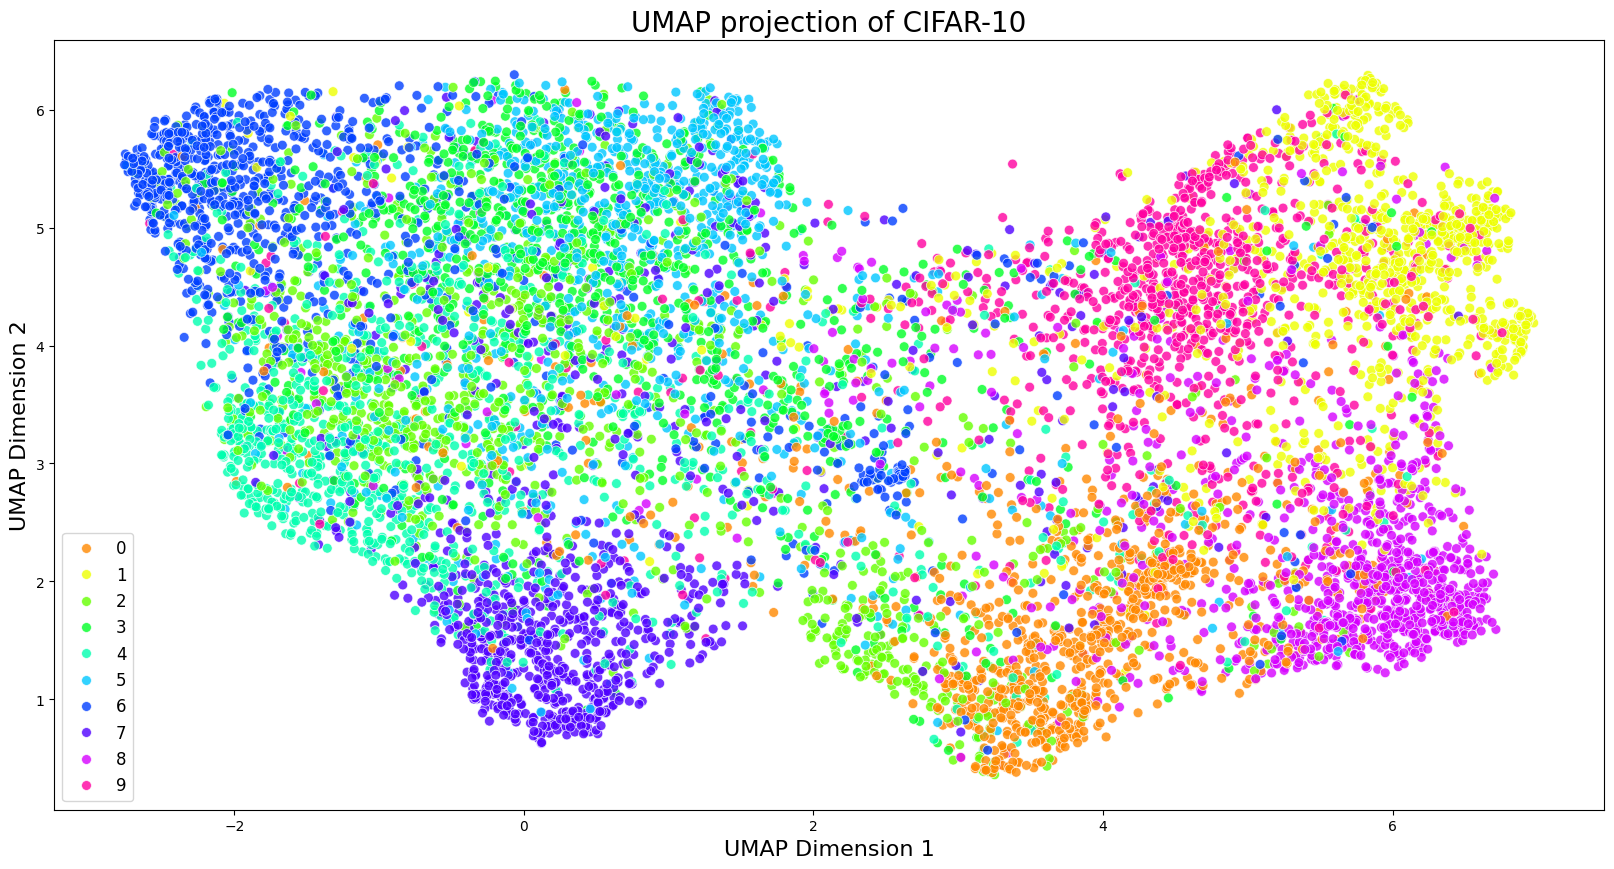

In [17]:
plt.figure(figsize=(20, 10), dpi=100)
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=testset.targets, palette=sns.color_palette("hsv", 10), legend='full', s=50, alpha=0.8)
plt.title('UMAP projection of CIFAR-10', fontsize=20)
plt.xlabel('UMAP Dimension 1', fontsize=16)
plt.ylabel('UMAP Dimension 2', fontsize=16)
plt.legend(fontsize=12)
plt.show()

hook_handle.remove()